In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import xgboost  as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve , cross_val_score , StratifiedKFold
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('cardio_train.csv' , sep=';')

In [3]:
df = df.drop(columns=['id'])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.shape

(70000, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [7]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.dtypes

age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [9]:
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(24)

In [11]:
df = df.drop_duplicates()
df.duplicated().sum()

np.int64(0)

## Outlier

### logical

In [12]:
def logical_outlier (df):
    df_temp =  df[
        (df['weight'] >= 30) & (df['weight'] <= 170) &
        (df['height'] >= 110) & (df['height'] <= 200) &
        (df['ap_hi'] >= 90) & (df['ap_hi'] <= 180) &
        (df['ap_lo'] >= 60) & (df['ap_lo'] <= 120) &
        (df['ap_hi'] > df['ap_lo'])
    ].copy()
    return df_temp



In [13]:
df = logical_outlier(df)
df.shape

(68121, 12)

### Mathematical

In [14]:
## we can't do IQR bcz it removes patient with high or low bp

In [15]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.1, random_state=42)
X_outlier_input = df.drop('cardio', axis=1)


is_anomly = iso.fit_predict(X_outlier_input)

df_ro = df[is_anomly==1].copy()

df_ro.shape

(61309, 12)

In [16]:
df_ro.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Feature Engineering

In [17]:
df = df_ro

In [18]:
df['age'] = (df['age']/365).round().astype(int)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,48,1,156,56.0,100,60,1,1,0,0,0,0


In [19]:
df = pd.get_dummies(df ,columns=[ 'cholesterol', 'gluc'] , drop_first=True )

df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,50,2,168,62.0,110,80,0,0,1,0,False,False,False,False
1,55,1,156,85.0,140,90,0,0,1,1,False,True,False,False
2,52,1,165,64.0,130,70,0,0,0,1,False,True,False,False
3,48,2,169,82.0,150,100,0,0,1,1,False,False,False,False
4,48,1,156,56.0,100,60,0,0,0,0,False,False,False,False


In [20]:
df.insert(7 , 'BMI' , df['weight'] / ((df['height'] / 100) ** 2))

df.insert(7, 'pulse_pressure', df['ap_hi'] - df['ap_lo'])

df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,pulse_pressure,BMI,alco,active,cardio,cholesterol_2,cholesterol_3,gluc_2,gluc_3
0,50,2,168,62.0,110,80,0,30,21.967120,0,1,0,False,False,False,False
1,55,1,156,85.0,140,90,0,50,34.927679,0,1,1,False,True,False,False
2,52,1,165,64.0,130,70,0,60,23.507805,0,0,1,False,True,False,False
3,48,2,169,82.0,150,100,0,50,28.710479,0,1,1,False,False,False,False
4,48,1,156,56.0,100,60,0,40,23.011177,0,0,0,False,False,False,False


In [21]:
x = df.drop(columns=['cardio'] , axis=1)
y = df['cardio']

In [22]:
numeric_columns = ['age' ,  'height' , 'weight' , 'ap_hi' , 'ap_lo', 'smoke', 'pulse_pressure' , 'BMI'  ]
categorical_columns = [col for col in x.columns if col not in numeric_columns]


## Pre-Processor

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num' , StandardScaler() , numeric_columns),
        ('cat' , 'passthrough' ,categorical_columns)
    ]
)


## model training

In [24]:
from sklearn.model_selection import train_test_split



x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20 ,random_state=42 )

x_train.shape


(49047, 15)

In [25]:

model = RandomForestClassifier(n_estimators=600 , random_state=42)

model.fit(x_train , y_train)

y_pred = model.predict(x_train)

accuracy_score(y_pred , y_train)



0.9729850959283952

In [26]:

from sklearn.linear_model import LogisticRegression

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

In [27]:
from sklearn.model_selection import StratifiedKFold


sfk = StratifiedKFold(n_splits=5 , shuffle=True , random_state=42 )
best_model = ""
best_score = 0

In [31]:



for model in models:
    pipe = Pipeline([
       ('preprocessor', preprocessor) ,
       ( 'model' ,models[model] )
    ])
    scores = cross_val_score(
        estimator= pipe,
        X=x,
        y=y,
        scoring="accuracy",
        cv=sfk
    )
    mean_score = scores.mean()
    print(f"{model} : accuracy - {scores.mean():.4f} +/- {scores.std():.4f}")
    if mean_score>best_score:
        best_score = mean_score
        best_model = model



Logistic Regression : accuracy - 0.7244 +/- 0.0032
Naive Bayes : accuracy - 0.7026 +/- 0.0045
K-Nearest Neighbors : accuracy - 0.6941 +/- 0.0036
Decision Tree : accuracy - 0.6324 +/- 0.0030
Random Forest : accuracy - 0.7014 +/- 0.0026
XGBoost : accuracy - 0.7260 +/- 0.0041
Gradient Boosting : accuracy - 0.7299 +/- 0.0039


In [32]:
print(f" best model is {best_model} and it's accuracy is {best_score*100: .2f}")

 best model is Gradient Boosting and it's accuracy is  72.99


In [33]:
pipeline_f = Pipeline(
    [
        ("preprocessor" , preprocessor),
        ("model" , models[best_model])
    ]
)

In [34]:
pipeline_f.fit(x_train , y_train)

y_pred = pipeline_f.predict(x_test)

acc= accuracy_score(y_test , y_pred)

print(f"Final Test Accuracy: {(acc*100):.2f}%")

Final Test Accuracy: 73.52%


## Overfit or underfit

In [35]:
y_pred = pipeline_f.predict(x_test)
acc= accuracy_score(y_pred , y_test)
print(f"Test Accuracy: {(acc*100):.2f}%")

y_tpred = pipeline_f.predict(x_train)
acc= accuracy_score(y_tpred , y_train)
print(f"Train Accuracy: {(acc*100):.2f}%")

Test Accuracy: 73.52%
Train Accuracy: 73.19%


## Learning Curve

In [36]:
train_size , train_scores , val_scores = learning_curve(
    estimator= pipeline_f,
    cv=5,
    X=x,
    y=y,
    train_sizes=np.linspace(0.1,1.0,10),
    shuffle=True,
    random_state=42,
    scoring= "accuracy"
)

In [37]:
tarin_means = np.mean(train_scores , axis=1)
train_stds = np.std(train_scores , axis=1)
value_means = np.mean(val_scores , axis=1)
value_stds = np.std(val_scores , axis=1)

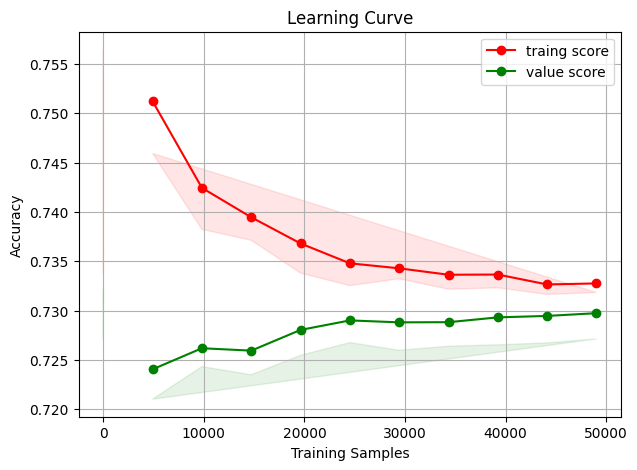

In [38]:
plt.figure(figsize=(7,5))
plt.plot(train_size ,tarin_means ,"o-", label ="traing score" , color = "red")
plt.plot(train_size ,value_means ,"o-", label ="value score" , color = "green")
plt.fill(train_size , tarin_means-train_stds , tarin_means+train_stds , color ="red" , alpha =0.1)
plt.fill(train_size , value_means-value_stds , value_means+value_stds , color="green" , alpha = 0.1)
plt.title("Learning Curve")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy") 
plt.legend(loc="best")
plt.grid(True)
plt.show()



## Confusion Metrics

Text(0.5, 23.52222222222222, 'Model Prediction')

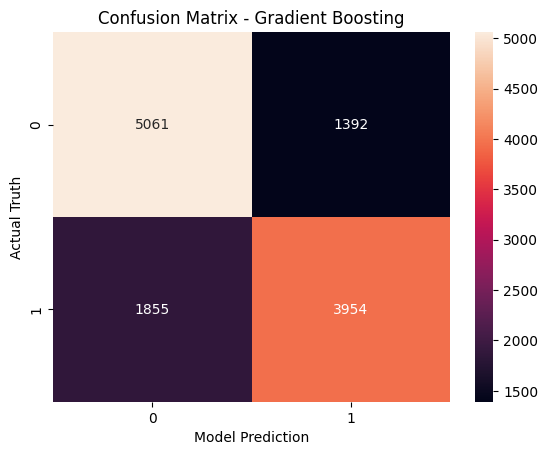

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.Figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True , fmt='d')
plt.title(f'Confusion Matrix - {best_model}')
plt.ylabel('Actual Truth')
plt.xlabel('Model Prediction')

### Clasification Report

In [40]:
from sklearn.metrics import classification_report


print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.73      0.78      0.76      6453
           1       0.74      0.68      0.71      5809

    accuracy                           0.74     12262
   macro avg       0.74      0.73      0.73     12262
weighted avg       0.74      0.74      0.73     12262



## ROC

In [41]:

y_prob = pipeline_f.predict_proba(x_test)[:, 1]
y_prob

array([0.30067974, 0.85475842, 0.85247237, ..., 0.18407302, 0.89820167,
       0.34080237], shape=(12262,))

In [42]:
print(accuracy_score(y_test , pipeline_f.predict(x_test)))

0.7351981732180721


In [43]:
y_prob

array([0.30067974, 0.85475842, 0.85247237, ..., 0.18407302, 0.89820167,
       0.34080237], shape=(12262,))

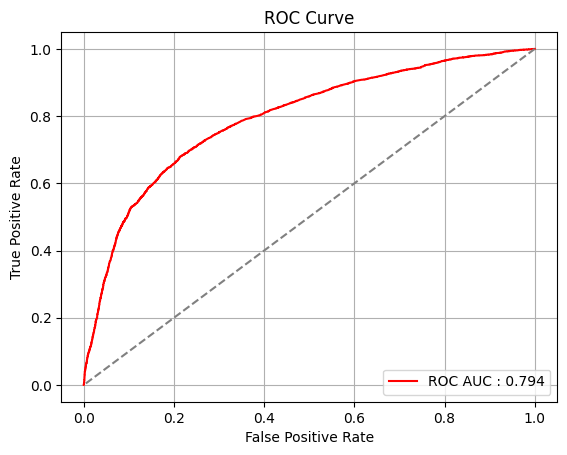

In [53]:
from sklearn.metrics import auc, roc_curve


fpr,tpr ,_ = roc_curve(y_test , y_prob)
AUC = auc(fpr,tpr)

plt.plot(fpr , tpr ,color='red' , label= f"ROC AUC : {AUC:.3f}")
plt.plot([1,0] , [1,0] , color='gray' ,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("static/images/roc.png")
plt.show()


## Precision-Recall curve

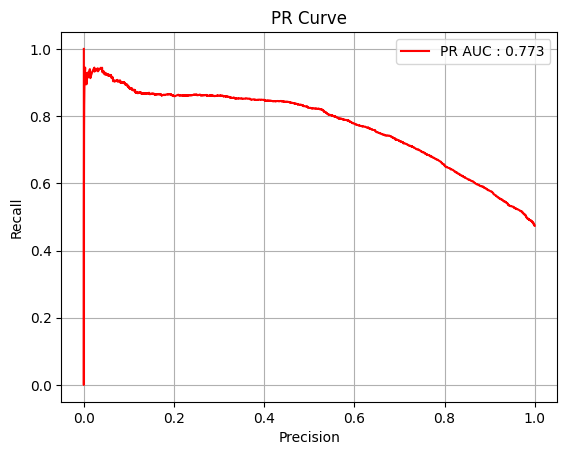

In [52]:
from sklearn.metrics import average_precision_score, precision_recall_curve


precision , recall , _ = precision_recall_curve(y_test , y_prob)
pr_AUC = average_precision_score(y_test , y_prob)
plt.plot(recall , precision ,color='red' , label= f"PR AUC : {pr_AUC:.3f}")
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('PR Curve')
plt.legend(loc='best')
plt.grid(True)
plt.savefig("static/images/pr.png")
plt.show()




## Callibraction Curve

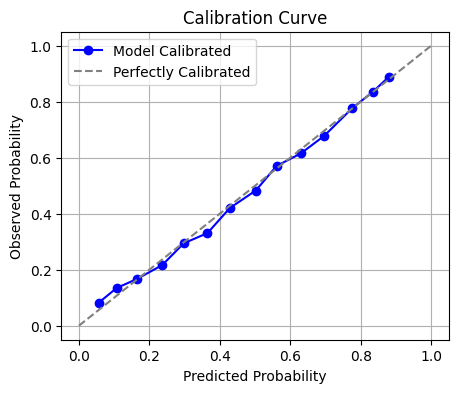

In [51]:
from sklearn.calibration import calibration_curve


prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=15)

plt.figure(figsize=(5,4))
plt.plot(prob_pred, prob_true, marker='o', color='blue', label='Model Calibrated')
plt.plot([0,1], [0,1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Probability')
plt.title('Calibration Curve')
plt.legend()
plt.grid(True)
plt.savefig("static/images/calibration.png")
plt.show()


In [47]:
import joblib


joblib.dump(pipeline_f, "model/final_model.pkl")

['model/final_model.pkl']

In [48]:
# temp = x_test
# # print(temp)
# print(accuracy_score(y_true=y_test,y_pred=modelt.predict(temp)))
## now model is trained according to pipeline scaled data so if do modelt it give error
# but if you run modelt.fit() code again than model will train accordint to that without pre processing but i export pipeline

In [49]:
# print(x_train.tail())
# y_train.tail()
y_pred = pipeline_f.predict(x_test)
print( accuracy_score(y_test , y_pred))

0.7351981732180721


In [50]:
metrics = {
    "accuracy": acc,
    "roc_auc": AUC,
    "pr_auc": pr_AUC
}
joblib.dump(metrics, "model/metrics.pkl")


['model/metrics.pkl']